# Data preprocessing and exploration

### GDrive mount

Mounting procedure for google drive.
Download the Kaggle dataset and store it in the google drive. As the size of the data is large the colab notebook and drive disk isn't in sync. 

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
# %cd drive/My Drive/plant_disease
# !git clone https://github.com/spMohanty/PlantVillage-Dataset/

In [2]:
%cd /content/drive/MyDrive/mp_dataset/datastore
!ls
# !unzip -q new-plant-diseases-dataset.zip -d datastore
# drive.flush_and_unmount()

/content/drive/MyDrive/mp_dataset/datastore
'new plant diseases dataset(augmented)'   test
'New Plant Diseases Dataset(Augmented)'


In [22]:
import os
import pandas as pd
import shutil
import matplotlib.pyplot as plt
import tensorflow as tf

In [8]:
data_dir = '/content/drive/MyDrive/mp_dataset/datastore/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'

### Exploring the number of plants, diseases and each plant/disease image counts

In [9]:
# Store all the train_dir sub directory names in folders list
folders = os.listdir(train_dir)
print(folders)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [10]:
# Count the number of unique plants, number of diseases and total classes

total_class = len(folders)

plants = []
total_disease = 0

for dir_name in folders:
  if dir_name.split('___')[0] not in plants:
    plants.append(dir_name.split('___')[0])
  if dir_name.split('___')[1] != 'healthy':
    total_disease += 1

print("Total classes available: ", total_class)
print("Number of unique plants: ", len(plants))
print("Total number of diseases: ", total_disease)

Total classes available:  38
Number of unique plants:  14
Total number of diseases:  26


In [11]:
# Display per class image count

map = {}
for dir_name in folders:
  map[dir_name] = len(os.listdir(os.path.join(train_dir, dir_name)))

images_per_class = pd.DataFrame(map.values(), index = map.keys(), columns=["Number of Images"])
images_per_class

,Number of Images
Apple___Apple_scab,2016
Apple___Black_rot,1987
Apple___Cedar_apple_rust,1760
Apple___healthy,2008
Blueberry___healthy,1816
Cherry_(including_sour)___Powdery_mildew,1683
Cherry_(including_sour)___healthy,1826
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot,1642
Corn_(maize)___Common_rust_,1907
Corn_(maize)___Northern_Leaf_Blight,1908


### Total images available for training

In [13]:
n_train = 0
for val in map.values():
  n_train += val
print("Total available images for training: ", n_train)

Total available images for training:  71097


## Data preparation

In [15]:
train_arr = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels="inferred"
)
valid_arr = tf.keras.preprocessing.image_dataset_from_directory(
    valid_dir,
    labels="inferred"
)

Found 71097 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


Display some random images along with their classes

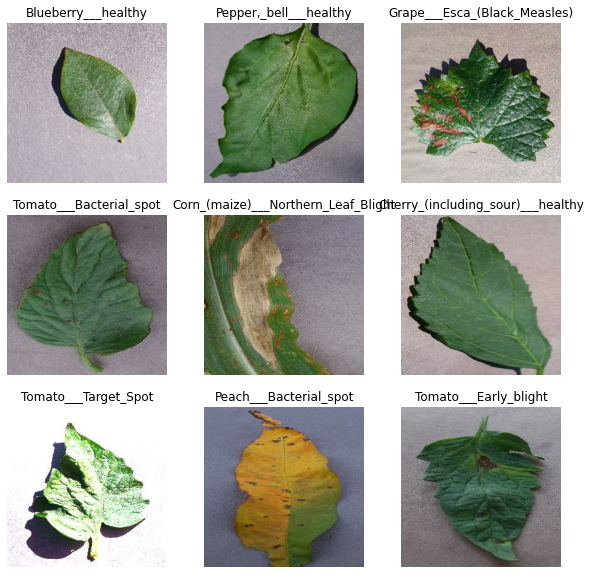

In [31]:
class_name = train_arr.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_arr.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_name[labels[i]])
    plt.axis("off")

Dimensions of the images

In [33]:
for image_batch, labels_batch in train_arr:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

#32 classes of images with each image of size 256 x 256 x 3

(32, 256, 256, 3)
(32,)
